<a href="https://colab.research.google.com/github/ScarrryMary/IT_MIPT_group25-26/blob/main/Seminar_14_25_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

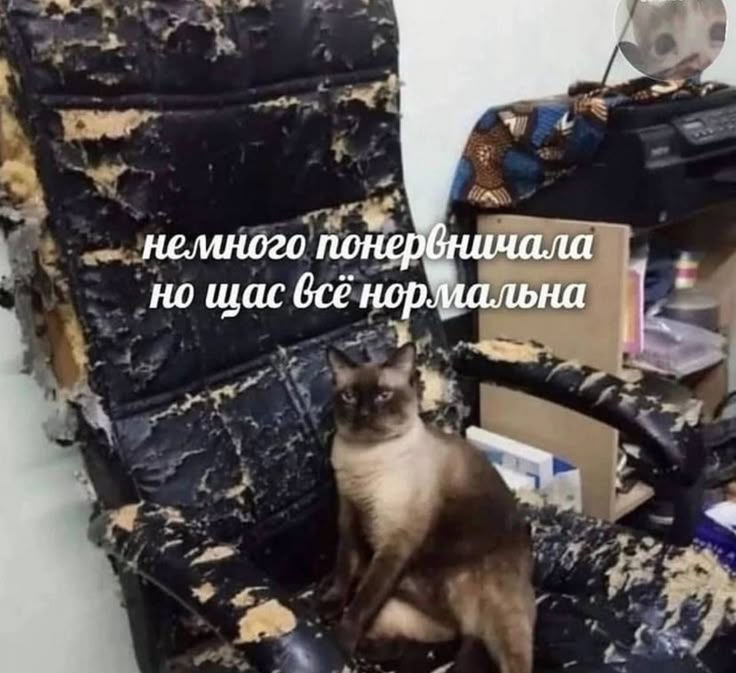

# Дерево отрезков (segment tree)
Это бинарное дерево, где каждый узел отвечает за некоторый отрезок массива.

* Корень — это весь массив: $[0,𝑛−1]$
* Левый ребёнок отвечает за левую половину отрезка
* Правый — за правую половину
* Листья — отдельные элементы массива

В каждом узле хранится значение, вычисленное для своего отрезка:

* сумма
* максимум
* минимум
* и т. д., в зависимости от задачи

$a=[2,5,1,4]$
```python
                 [0,3] sum=12
              /                 \
      [0,1] sum=7            [2,3] sum=5
      /       \              /          \
 [0,0]=2   [1,1]=5     [2,2]=1      [3,3]=4
```

Пусть наш массив a имеет n элементов: $a[0], a[1], ... ,a[n−1]$.  
Выберем $h$ такое, что $2^h ≥ n$. Дополним наш массив справа нейтральными элементами так, чтобы его длина равнялась $2^h$. Тогда для хранения дерева отрезков, построенного на элементах массива $a$, нам понадобится массив
$b$ из $2^{h+1}$ ячеек.

Нулевую ячейку в массиве $b$ мы использовать не будем, а ячейки с первой по
$(2^{h+1}−1)$-ю будут соответствовать вершинам двоичного дерева с соответствующими номерами. Обычно используется нумерация вершин дерева отрезков в порядке обхода в ширину, то есть корень дерева имеет номер 1, а левый и правый сыновья вершины с номером $v$ имеют номера $2v$ и
$2v+1$ соответственно.


Чтобы решить задачу, сделаем с исходным массивом следующие манипуляции.

Посчитаем сумму всего массива и где-нибудь запишем. Потом разделим его пополам, посчитаем сумму на половинах и тоже где-нибудь запишем. Каждую половину потом разделим пополам ещё раз, и так далее, пока не придём к отрезкам длины 1.

Эту последовательность разбиений можно представить в виде дерева.






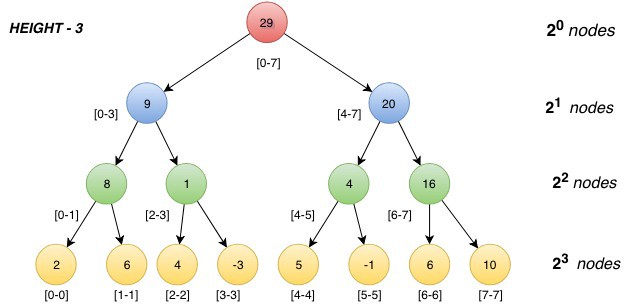

Корень этого дерева соответствует отрезку $[0,n)$, а каждая вершина (не считая листьев) имеет ровно двух сыновей, которые тоже соответствуют каким-то отрезкам. Отсюда и название — «дерево отрезков».

### Разные полезные свойства
Высота дерева отрезков равна $Θ(logn)$: на каждом новом уровне длина отрезка уменьшается вдвое. Этот факт будет ключевым для оценки асимптотики операций.

Любой полуинтервал разбивается на $O(logn)$ неперекрывающихся полуинтервалов, соответствующих в вершинам дерева: с каждого уровня нам достаточно не более двух отрезков.

Дерево содержит менее $2n$ вершин: первый уровень дерева отрезков содержит одну вершину (корень), второй уровень — в худшем случае две вершины, на третьем уровне в худшем случае будет четыре вершины, и так далее, пока число вершин не достигнет $n$. Таким образом, число вершин в худшем случае оценивается суммой
$n + n/2 + n/4 + n/8 + … + 1 < 2n$. Значит, оно линейное по памяти.

При $n$, отличных от степеней двойки, не все уровни дерева отрезков будут полностью заполнены. Например, при $n=3$ левый сын корня есть отрезок $[0,2)$, имеющий двух потомков, в то время как правый сын корня — отрезок $[2,3)$, являющийся листом.

## Построение дерева
$__init__ + _build$  
Рекурсивно строим:

* если $l=r$: лист, храним $a[l]$
* иначе строим детей и объединяем их значения

$v$ — текущий индекс узла в массиве $t$.

$[tl, tr]$ — отрезок исходного массива, который покрывает узел $v$.

* Если $tl == tr$ — это лист: узел покрывает один элемент $a[tl]$. Записываем $self.t[v] = a[tl]$.

Иначе:

* находим $tm = (tl + tr) // 2$ — середина отрезка;

* строим левое поддерево $_build(a, v*2, tl, tm)$ — отвечает за $[tl, tm]$;

* строим правое $_build(a, v*2+1, tm+1, tr)$ — отвечает за $[tm+1, tr]$;

* объединяем значения детей: $self.t[v] = self.t[v*2] + self.t[v*2+1]$.

**Важно**: здесь объединение — операция + (сумма). Для других задач (min/max/gcd) на этом месте ставится другая операция, а нейтральный элемент для пустого интервала меняется.



In [ ]:
class SegmentTree:
    def __init__(self, a):
        self.n = len(a)
        self.t = [0] * (4 * self.n)
        self._build(a, 1, 0, self.n - 1)

    def _build(self, a, v, tl, tr):
        if tl == tr:
            self.t[v] = a[tl]
        else:
            tm = (tl + tr) // 2
            self._build(a, v * 2, tl, tm)
            self._build(a, v * 2 + 1, tm + 1, tr)
            self.t[v] = self.t[v * 2] + self.t[v * 2 + 1]

**Асимптотика**: $O(n)$ — каждый элемент массива используется ровно один раз.

## Запрос суммы на отрезке
query + _query  

$query(self, l, r)$ — публичный метод: он просто вызывает _query(1, 0, n-1, l, r).

**_query(self, v, tl, tr, l, r)** — рекурсивный разбор:

* $[tl, tr]$ — текущий узел; $[l, r]$ — запрашиваемый отрезок.

Возможные ситуации:
```python
if l > r: return 0 — если запрос стал пустым (например, при частичном разбиении), возвращаем нейтральный элемент (0 для суммы).

if l == tl and r == tr: return self.t[v] — если текущий узел полностью лежит внутри запроса — возвращаем его значение напрямую (важно для эффективности).

Иначе: вычисляем tm = (tl + tr) // 2, рекурсивно запрашиваем у детей:

левый запрос: [l, min(r, tm)] в левом поддереве [tl, tm],

правый: [max(l, tm + 1), r] в правом поддереве [tm + 1, tr].

складываем результаты и возвращаем.
```
**Почему это быстро?** Потому что запрос разбивается на не более O(log n) узлов (на каждом уровне не больше двух узлов активно).

**Асимптотика**: $O(log n)$ на один запрос.

In [ ]:
def query(self, l, r):
  return self._query(1, 0, self.n - 1, l, r)

def _query(self, v, tl, tr, l, r):
  if l > r:
      return 0
  if l == tl and r == tr:
      return self.t[v]
  tm = (tl + tr) // 2
  left = self._query(v * 2, tl, tm, l, min(r, tm))
  right = self._query(v * 2 + 1, tm + 1, tr, max(l, tm + 1), r)
  return left + right

## Обновление элемента
update + _update

$update(self, pos, val)$ — публичный: вызывает _update(1, 0, n-1, pos, val).

**_update(self, v, tl, tr, pos, val)**:
```python
Если tl == tr — достигли листа, присваиваем self.t[v] = val.

Иначе: считаем tm = (tl + tr) // 2.

Если pos <= tm — спускаемся в левое поддерево.

Иначе — в правое.

После возврата из рекурсии обновляем текущее значение как сумма детей:
self.t[v] = self.t[v*2] + self.t[v*2 + 1].
```
Таким образом изменения "поднимаются" вверх по дереву — каждый узел на пути от листа к корню пересчитывается один раз.

**Асимптотика**: $O(log N)$ — длина пути от корня до листа.

In [1]:
def update(self, pos, val):
    self._update(1, 0, self.n - 1, pos, val)

def _update(self, v, tl, tr, pos, val):
    if tl == tr:
        self.t[v] = val
    else:
        tm = (tl + tr) // 2
        if pos <= tm:
            self._update(v * 2, tl, tm, pos, val)
        else:
            self._update(v * 2 + 1, tm + 1, tr, pos, val)
        self.t[v] = self.t[v * 2] + self.t[v * 2 + 1]

### Нейтральный элемент и смена операции

В этом коде нейтральный элемент для пустого интервала — 0 (для суммы).

```python
Чтобы поддержать min, заменяем:

нейтральный элемент на float('inf') (в _query и инициализации t),

объединение self.t[v] = min(self.t[v*2], self.t[v*2+1]),

и _query возвращает inf если l > r.

Аналогично для max — нейтральный элемент -inf, объединение max.
```

## Lazy propagation
Lazy propagation — это техника расширения дерева отрезков, которая позволяет выполнять обновления на отрезках (например, прибавить число ко всем элементам диапазона $[l,r]$) за $O(log n)$, не затрагивая каждый элемент массива.

Она делает дерево отрезков “ленивым”:
мы откладываем часть работы на потом, чтобы не обходить весь сегмент целиком.

В каждом узле дерева отрезков хранится:

* значение узла — результат на его отрезке (например, сумма)

* lazy-метка — отложенное обновление, которое ещё не применено к детям

**Принцип**:

* Если обновление полностью покрывает сегмент — обновляем только текущий узел, но не спускаемся в детей.

* Вместо этого записываем “когда-нибудь обновить детей” в lazy-массив.

Если позже понадобится зайти в этого ребёнка (при запросе или дальнейшем обновлении),
lazy-метка будет “протолкнута” вниз (push) — и ребёнок обновится тогда.

### Пример: "прибавить x ко всему отрезку"
На стандартном дереве:
```python
update_range(l, r, x):
    a[l] += x
    a[l+1] += x
    ...
    a[r] += x

```
Это занимает $O(r−l+1)$.

В дереве с lazy propagation:

* обновление любого отрезка в массиве делает $O(log n)$ узлов

* остальные узлы получают только метки, без пересчёта

```python
Каждый узел хранит:

t[v] — значение на отрезке
lazy[v] — сколько нужно прибавить детям, когда они понадобятся
```

push(v) — функция проталкивания метки детям:
```python
t[left child] += lazy[v] * (кол-во элементов в левом сегменте)

t[right child] += lazy[v] * (кол-во элементов в правом сегменте)

lazy[left] += lazy[v]

lazy[right] += lazy[v]

lazy[v] = 0 # обнулили метку в родителе
```
Зачем перемножение?
Потому что t[v] — сумма на сегменте, а изменение одного элемента влияет на всю длину сегмента.

Реализуем дерево отрезков с lazy propagation для операции:

* прибавить x на диапазоне

* получить сумму на диапазоне

In [2]:
class LazySegmentTree:
    def __init__(self, a):
        self.n = len(a)
        self.t = [0] * (4 * self.n)
        self.lazy = [0] * (4 * self.n)
        self._build(a, 1, 0, self.n - 1)

    def _build(self, a, v, tl, tr):
        if tl == tr:
            self.t[v] = a[tl]
        else:
            tm = (tl + tr) // 2
            self._build(a, v*2, tl, tm)
            self._build(a, v*2+1, tm+1, tr)
            self.t[v] = self.t[v*2] + self.t[v*2+1]

    def _push(self, v, tl, tr):
        """Проталкиваем lazy-метку детям."""
        if self.lazy[v] != 0:
            tm = (tl + tr) // 2

            # обновляем детей
            self.t[v*2] += self.lazy[v] * (tm - tl + 1)
            self.t[v*2+1] += self.lazy[v] * (tr - tm)

            # записываем, что детям тоже нужно будет протолкнуть
            self.lazy[v*2] += self.lazy[v]
            self.lazy[v*2+1] += self.lazy[v]

            # очищаем метку
            self.lazy[v] = 0

    def update_range(self, l, r, add):
        self._update_range(1, 0, self.n - 1, l, r, add)

    def _update_range(self, v, tl, tr, l, r, add):
        if l > r:
            return
        if l == tl and r == tr:
            # обновляем текущий узел
            self.t[v] += add * (tr - tl + 1)
            self.lazy[v] += add
        else:
            self._push(v, tl, tr)

            tm = (tl + tr) // 2
            self._update_range(v*2, tl, tm, l, min(r, tm), add)
            self._update_range(v*2+1, tm+1, tr, max(l, tm+1), r, add)

            self.t[v] = self.t[v*2] + self.t[v*2+1]

    def query(self, l, r):
        return self._query(1, 0, self.n - 1, l, r)

    def _query(self, v, tl, tr, l, r):
        if l > r:
            return 0
        if l == tl and r == tr:
            return self.t[v]

        self._push(v, tl, tr)
        tm = (tl + tr) // 2

        return (
            self._query(v*2, tl, tm, l, min(r, tm)) +
            self._query(v*2+1, tm+1, tr, max(l, tm+1), r)
        )


In [7]:
a = [1, 2, 3, 4]

tree = LazySegmentTree(a)

print(tree.query(0, 2))
tree.update_range(0, 2, 5)  # прибавляем 5 к [0,2]
# массив стал: [6, 7, 8, 4]

print(tree.query(0, 2))
#print(tree.query(1, 2))


6
21


```python
Дерево отрезков:

                    [0–7] (v=1)
                   /            \
         [0–3] (2)               [4–7] (3)
        /        \              /        \
              
   /   \       /   \       /   \        /   \
[0]    [1]   [2]   [3]   [4]   [5]    [6]   [7]
```

мы хотим прибавить +5 на отрезке [2–5]

```python
Обозначим обновляемый диапазон красным:

                [0–7]
                   |
        +----------+----------+
        |                     |
     [0–3]                 [4–7]
        |                     |
     [2–3]*               [4–5]*


У звёздочкой — узлы, полностью покрытые нашим запросом.
```
**Шаг 1. Обрабатываем корень [0–7]**

Отрезок [2–5] пересекается с [0–7],
но не покрывает полностью, поэтому спускаемся вниз:
```
lazy[1] = 0 (ничего не делаем)
```
Двигаемся по детям.

**Шаг 2. Узел [0–3] (v=2)**

* Диапазон [2–3] (правая половина) полностью входит в запрос [2–5].

* Мы обновляем узел целиком, но не трогаем его детей:
```python
t[5] += 5 * (2 элемента)
lazy[5] += 5

В дереве:

                [0–7]
              /        \
      [0–3] (частично)  [4–7]
         |
       [2–3]  ← lazy = 5
```

**Шаг 3. Узел [4–7] (v=3)**
```python
Для [4–5] — полное покрытие [2–5], поэтому снова:

t[6] += 5 * (2 элемента)
lazy[6] += 5


Дерево стало:

                    [0–7]
                  /        \
        [0–3]               [4–7]
           |                  |
       [2–3]* (lazy=5)    [4–5]* (lazy=5)
```

**Что такое push (проталкивание)?**

Представим, что позже мы делаем запрос, который потребует зайти в узел [2–3].

В этот момент lazy-метка протолкнётся:
```pyhton
push(5):

lazy[5] = 5

Детям прибавляем:
 t[10] += 5 * 1 элемент
 t[11] += 5 * 1 элемент
 lazy[10] += 5
 lazy[11] += 5

lazy[5] = 0


Графически:

       [2–3] (lazy=5)
        /     \
     [2]     [3]

после push():

       [2–3] (lazy=0)
        /     \
   [2]+5     [3]+5
 lazy=5      lazy=5
```

Lazy-метка раздаётся детям только когда нужно.

До push:
```
       [2–3]
      t=50
      lazy=5
      /    \
  [2]      [3]
 t=20     t=25
lazy=0    lazy=0
```

После push:
```
       [2–3]
      t=50
      lazy=0
      /          \
 [2]              [3]
t=25 (+5)       t=30 (+5)
lazy=5           lazy=5
```

И родительская lazy-метка исчезает, потому что она полностью протолкнута.

### Когда используют
Segment Tree используют, когда нужно выполнять много разных операций над отрезками:

* сумма на отрезке

* минимум/максимум на отрезке

* НОД

* изменение одного элемента

* изменение всего отрезка (lazy propagation)

* прибавить +x на отрезке

* присвоить x на отрезке

* найти первую позицию, где сумма ≥ k

и много других

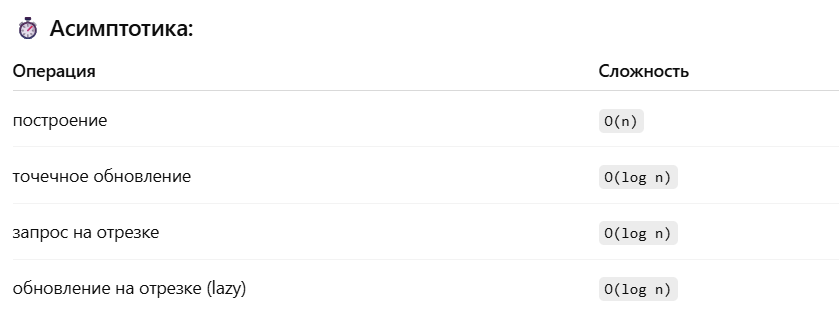

# Дерево Фенвика
Дерево Фенвика или двоичное индексированное дерево (англ. binary indexed tree) — структура данных, которая на многих задачах заменяет собой дерево отрезков, но при этом работает в 3-4 раза быстрее, занимает минимально возможное количество памяти (столько же, сколько и массив той же длины), намного быстрее пишется и легче обобщается на большие размерности.

### Операция F

Операция F может быть выбрана разными способами, но чаще всего берутся операции суммы интервала, произведение интервала, а также при определенной модификации и ограничениях, нахождения максимума и нахождения минимума на интервале или другие операции.

Дерево Фенвика хранит частичные суммы в хитро устроенном массиве так, чтобы:

* получить сумму на префиксе → $O(log n)$

* изменить значение элемента → $O(log n)$

* памяти нужно → $O(n)$

При этом Fenwick tree проще и компактнее, чем дерево отрезков.



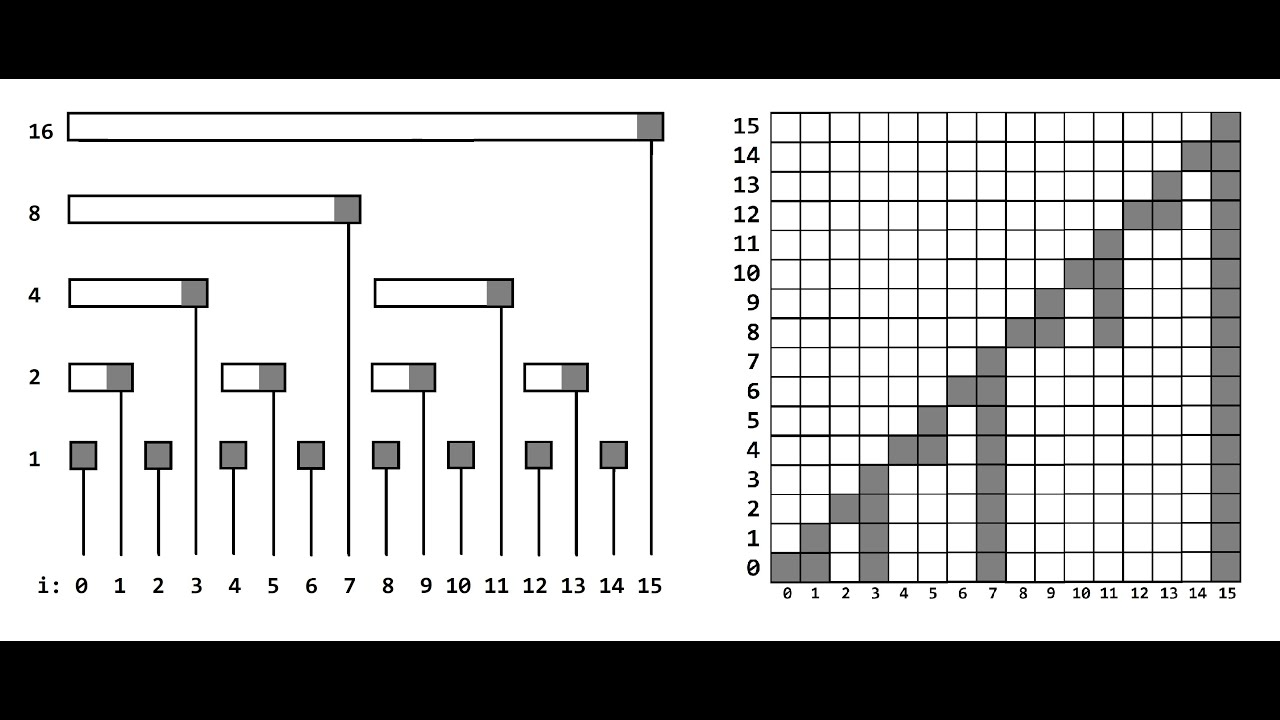

По горизонтали — индексы массива $T$ ($T_i$ является суммой элементов массива $A$, индексы которых заштрихованы), по вертикали — индексы массива A

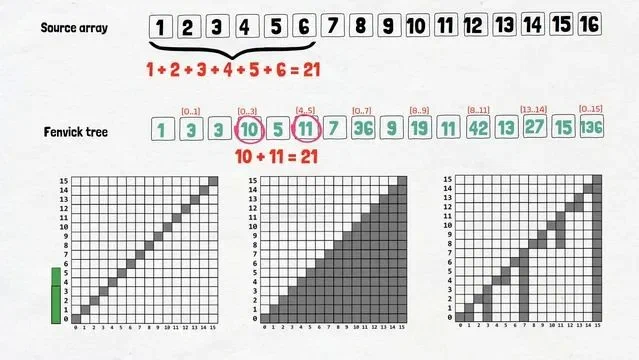

## Идея
```python
Массив fenw[] хранит суммы определённых отрезков длиной степени двойки.
```
Для индекса $i$ Fenwick хранит сумму:
```python
fenw[i] = сумма элементов массива a
          на отрезке длины lowbit(i), заканчивающемся в i
где:

lowbit(i) = i & -i  (наименьшая степень двойки, входящая в i)
```
Например, индекс 12 = 1100₂, lowbit = 4, значит:
```python
fenw[12] хранит сумму элементов [9, 12]
```
Это значит:
```python
fenw[12] хранит сумму элементов:
a[9], a[10], a[11], a[12]
```

Начиная от 12 идём назад ровно на 4 элемента.

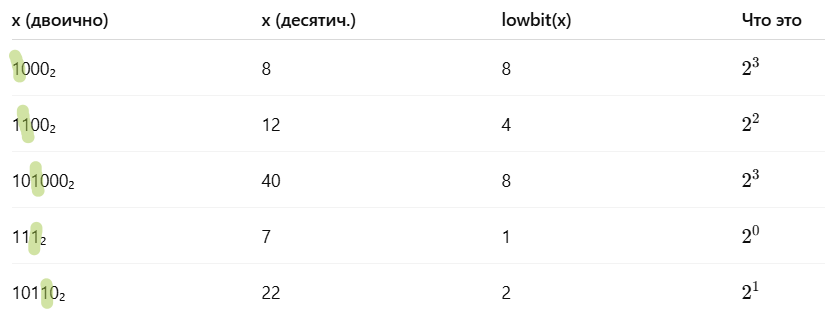

### Почему x & -x даёт именно эту степень двойки?

Чтобы понять это, нужно знать, как в компьютере представляется отрицательное число.

В двоичном представлении:
```
-x = ~x + 1   (дополнительный код)
```
Рассмотрим пример:

1. Возьмём число:
```
x = 12 = 1100₂
```

2. Берём побитовое отрицание:
```
~x = 0011
```

3. Прибавляем 1:
```
-x = 0011 + 1 = 0100₂
```
4. Теперь делаем:
```
x & -x = 1100₂ & 0100₂ = 0100₂ = 4
```

## Построение дерева

Есть два способа:

* добавлять элементы по одному ($O(n log n)$)

* использовать линейное построение

Если мы строим дерево в классическом виде, т.е. делаем:
```python
for i in 1..n:
    update(i, a[i])
```

а операция update(i, x) делает:
```python
while i <= n:
    fw[i] += x
    i += lowbit(i)
```

То для каждого $i$ мы делаем $O(log n)$ прыжков.

А всего n элементов → итоговая асимптотика:

$T(n) = n × O(log n) = O(n log n)$



In [1]:
class FenwickTree:
    def __init__(self, n):
        self.n = n
        self.fw = [0] * (n + 1)

    def build(self, a):
        """Построение Fenwick tree за O(n log n)."""
        for i, val in enumerate(a, start=1):
            self.update(i, val)

## Префиксная сумма
$sum(1..r) — O(log n)$  
Мы поднимаемся вверх по дереву, отбрасывая lowbit:


In [ ]:
def prefix_sum(self, i):
  """Сумма на префиксе [1..i]."""
  s = 0
  while i > 0:
      s += self.fw[i]
      i -= i & -i  # поднимаемся к родителю
  return s

## Обновление элемента
$O(log n)$  
Чтобы прибавить $delta$ к элементу $a[i]$, идём вверх:

In [2]:
def update(self, i, delta):
  """Увеличить элемент a[i] на delta."""
  while i <= self.n:
      self.fw[i] += delta
      i += i & -i  # поднимаемся к следующему узлу

## Сумма на отрезке $[l, r]$
$O(log n)$
```python
sum(r) - sum(l-1)
```

In [3]:
def range_sum(self, l, r):
  """Сумма на отрезке [l, r]."""
  return self.prefix_sum(r) - self.prefix_sum(l - 1)

## Весь код

In [10]:
class FenwickTree:
    def __init__(self, n):
        self.n = n
        self.fw = [0] * (n + 1)

    def build(self, a):
        """Построение Fenwick tree за O(n log n)."""
        for i, val in enumerate(a, start=1):
          print(f'i: {i}, val: {val}')
          self.update(i, val)

    def update(self, i, delta):
        """Увеличить элемент a[i] на delta."""
        while i <= self.n:
            self.fw[i] += delta
            i += i & -i  # поднимаемся к следующему узлу

    def prefix_sum(self, i):
        """Сумма на префиксе [1..i]."""
        s = 0
        while i > 0:
            s += self.fw[i]
            i -= i & -i  # поднимаемся к родителю
        return s

    def range_sum(self, l, r):
        """Сумма на отрезке [l, r]."""
        return self.prefix_sum(r) - self.prefix_sum(l - 1)


In [14]:
a = [2, 1, 4, 5, 3]
ft = FenwickTree(len(a))
ft.build(a)
#print(ft)

print(ft.prefix_sum(3))   # сумма [2,1,4] = 7
print(ft.range_sum(2, 4)) # 1 + 4 + 5 = 10

ft.update(3, 6)  # a[3] += 6, теперь a[3] = 10

print(ft.range_sum(1, 5)) # общая сумма


i: 1, val: 2
i: 2, val: 1
i: 3, val: 4
i: 4, val: 5
i: 5, val: 3
7
10
21


### Когда используют
Когда нужно хранить префиксные суммы, и при этом:

* обновления — точечные

* запросы — суммы или другие «групповые» операции

Используют для:

* сумма на отрезке (через два префикса)

* точечное обновление

* быстро найти: первая позиция, где сумма ≥ k

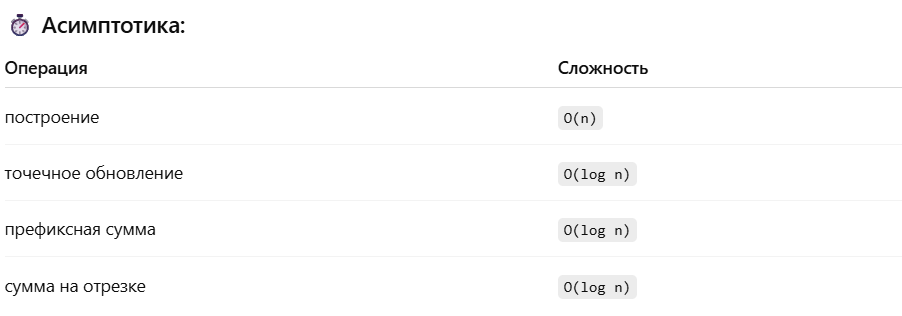

# Сравнение Fenwick Tree и Segment Tree

**Segment Tree** — полная иерархия
```python
уровень 0:                  [1..8]
уровень 1:        [1..4]                [5..8]
уровень 2:   [1..2]  [3..4]         [5..6]  [7..8]
уровень 3:  [1] [2] [3] [4]        [5] [6] [7] [8]
```
Каждый уровень вдвое меньше предыдущего.

**Fenwick Tree** — интервалы lowbit длины
```python
индекс:         1     2       3        4          5     6       7       8
покрытие:      [1]  [1..2]  [3]    [1..4]       [5]  [5..6]   [7]   [1..8]
```
Покрытия «накидываются» друг на друга:
```python
[1]
[1..2]
[1..4]
[1..8]
```
и между ними — одиночные сегменты.

### Как выглядит обход при запросе суммы
Segment Tree

Путь разветвляется, посещая 2–4 узла:
```python
sum(3..7):

      [1..8]
       /   \
   [1..4]  [5..8]
      |       |
    [3..4] [5..6]
```

Fenwick Tree

Двигаемся вниз по индексам, отсчитывая lowbit(i):
```python
sum(1..7):
7 → 6 → 4 → 0
```

Графически:
```python
fw7 + fw6 + fw4
[7]  [5..6]  [1..4]
```

# Разреженная таблица (SparseTable)

это структура данных, которая позволяет очень быстро отвечать на запросы вида:

* минимум на отрезке (RMQ)

* максимум на отрезке

* НОД на отрезке

* сумма — нельзя (нет ассоциативности для перекрывающихся интервалов)

Чтобы отвечать на запросы быстро, мы заранее храним ответы для всех отрезков длины:
```python
1, 2, 4, 8, 16, 32, …
```

То есть для каждого $i$ и $k$ храним значение:
```python
ST[i][k] = ответ на отрезке длины 2ᵏ начиная в позиции i:
[a[i], a[i+1], …, a[i + 2ᵏ − 1]]
```
Размер таблицы: $n × log n$



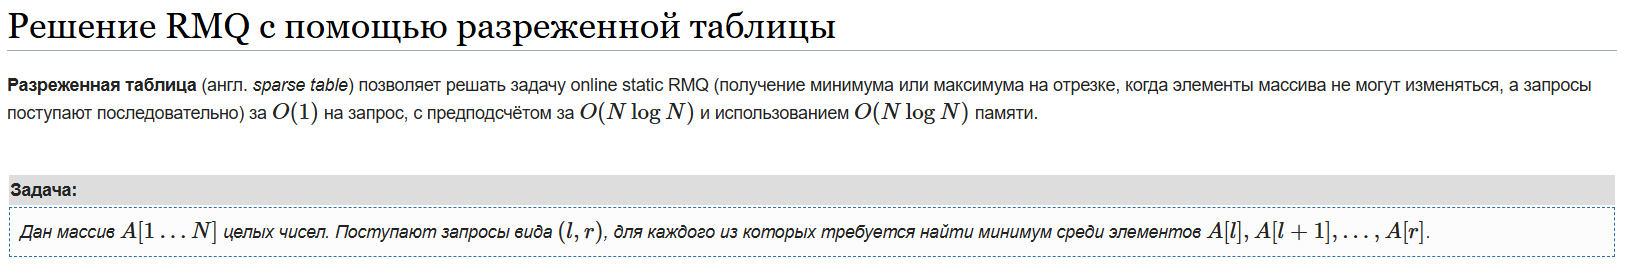

https://neerc.ifmo.ru/wiki/index.php?title=%D0%A0%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_RMQ_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D1%80%D0%B0%D0%B7%D1%80%D0%B5%D0%B6%D0%B5%D0%BD%D0%BD%D0%BE%D0%B9_%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D1%8B

https://www.geeksforgeeks.org/dsa/sparse-table/?ysclid=mirmvvbngd474859896

## Построение

Идёт так:

**Шаг 1**: база

* Каждый элемент — отрезок длины 1 = 2⁰:
```python
ST[i][0] = a[i]
```
**Шаг 2**: динамика

* Чтобы заполнить длину 2ᵏ, используем два половинных отрезка длины $2^{k−1}$:
```python
ST[i][k] = f(ST[i][k−1], ST[i + 2^(k−1)][k−1])
```



## Запрос RMQ (минимум на отрезке - Range Minimum Query)

Чтобы найти минимум на [L, R], берём два перекрывающихся интервала одинаковой длины:
```python
k = floor(log2(R − L + 1))
len = 2ᵏ

ответ = min(ST[L][k], ST[R − len + 1][k])
```

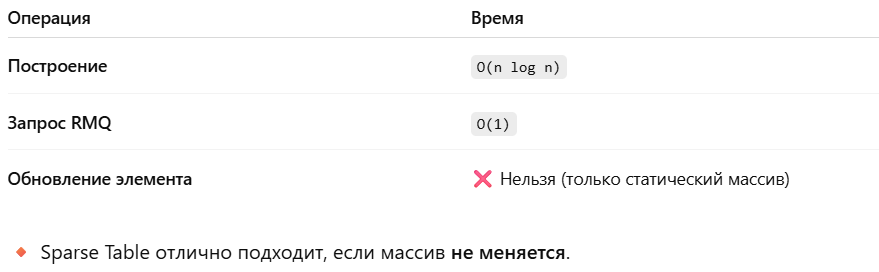

In [1]:
import math

class SparseTable:
    def __init__(self, arr, func=min):
        self.n = len(arr)
        self.func = func
        self.LOG = int(math.log2(self.n)) + 1

        # ST[i][k] — ответ на диапазоне длины 2^k от i
        self.ST = [[0] * self.LOG for _ in range(self.n)]

        # База: отрезки длины 1
        for i in range(self.n):
            self.ST[i][0] = arr[i]

        # Заполнение Sparse Table
        k = 1
        while (1 << k) <= self.n:
            step = 1 << k
            half = step >> 1
            for i in range(self.n - step + 1):
                self.ST[i][k] = func(self.ST[i][k-1], self.ST[i + half][k-1])
            k += 1

    def query(self, L, R):
        """ RMQ на отрезке L..R """
        length = R - L + 1
        k = length.bit_length() - 1  # floor(log2(length))
        return self.func(self.ST[L][k], self.ST[R - (1 << k) + 1][k])

### Как работает запрос за O(1)?
```python
Пример: хотим RMQ на [2, 13].

Длина = 12
k = floor(log2(12)) = 3, len = 8

Берём два интервала длины 8:

[2..9] и [6..13]
```
```python
[L, L + 2ᵏ - 1]
[R - 2ᵏ + 1, R]
```

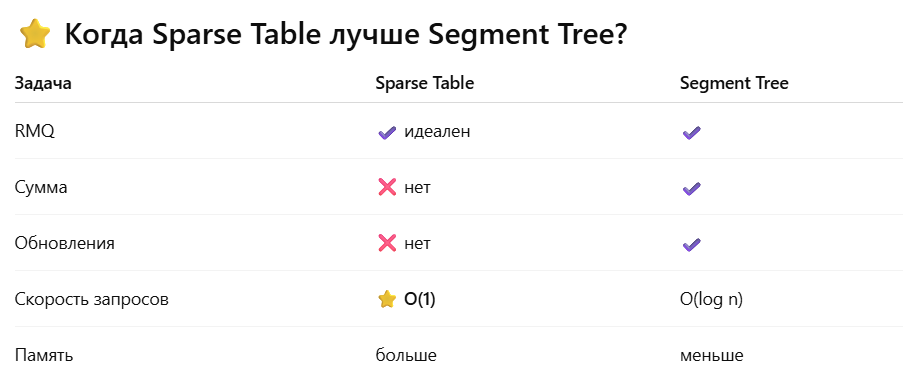

# Контест (мы обсуждаем, но не осуждаем)

### Числа
Что можно придумать?
1. Из-за неубывающего порядка массива одинаковые значения образуют непересекающиеся блоки.

Для каждого индекса k считаем:

* L[k] — начало блока

* R[k] — конец блока

* block_id[k] — номер блока

2. Создаём массив block_len[], где храним длину каждого блока.

3. Строим по block_len **Sparse Table**, который умеет отвечать на max по диапазону.

Для каждого запроса [i, j] максимум может быть:

* внутри первого блока

* внутри последнего блока

* среди полностью покрытых блоков → SparseTable
```python
индекс:      0   1   2   3   4   5   6   7   8   9
значение:   -1  -1   1   1   1   1   3  10  10  10
         |---0---|  |------1------|  |2| |---3---|
блок id:   0   0     1   1   1   1    2  3   3   3
```


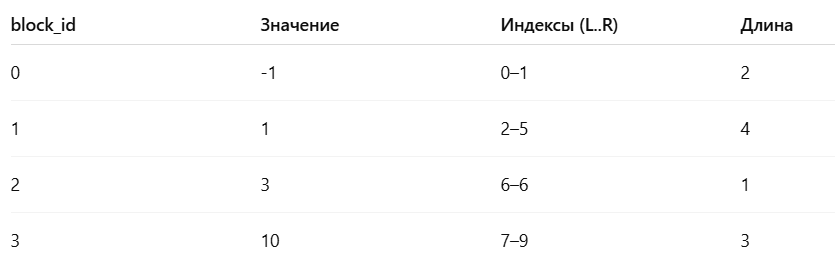

Массив L[k]: начало блока для каждого индекса
```python
k:        0 1 2 3 4 5 6 7 8 9
L[k]:     0 0 2 2 2 2 6 7 7 7
```
2. Массив R[k]: конец блока
```python
k:        0 1 2 3 4 5 6 7 8 9
R[k]:     1 1 5 5 5 5 6 9 9 9
```
3. Массив block_id[k]
```python
k:           0 1 2 3 4 5 6 7 8 9
block_id:    0 0 1 1 1 1 2 3 3 3
```
4. Массив длин блоков block_len  
Это длины блоков по порядку:
```python
block_len = [2, 4, 1, 3]
```